In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargar datos

In [2]:
# Importamos el dataset de los datos de los pokemones
df = pd.read_csv('dataset_final.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


****

In [3]:
'''
1. ¿Cuántos pokémones hay en el dataset?
'''
cantidad = df["Name"].count()

print("Cantidad de pokémones:", cantidad)


Cantidad de pokémones: 800


****

In [4]:
'''
2. ¿Cuántos pokémones hay de tipo Poison? (Type 1)
'''
cantidad_poison = df[df["Type 1"] == "Poison"]["Name"].count()
print("Cantidad de pokémones tipo Poison:", cantidad_poison)

Cantidad de pokémones tipo Poison: 28


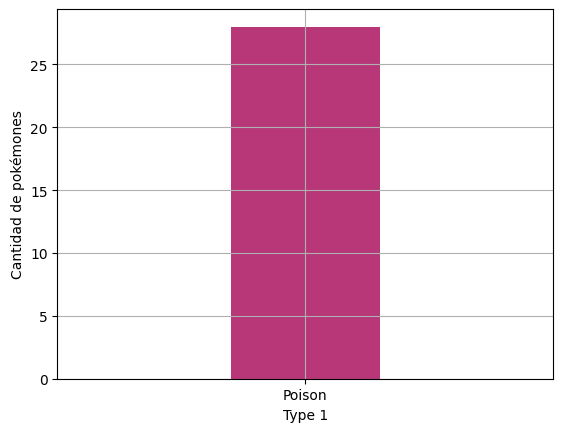

In [5]:
# Gráficos extras para practicar y poner un poco de color
c = sns.countplot(data=df, x="Type 1", order=["Poison"], 
                          palette="magma", saturation=1, width=0.3)
c.set_ylabel("Cantidad de pokémones")
plt.grid()
plt.show()

****

In [6]:
'''
3. ¿Cuántos tipos diferentes de pokémon hay? (Type 1)
'''
tipos_poke = df['Type 1'].nunique()
print("Tipos diferentes de pokémones (Type 1):", tipos_poke)


Tipos diferentes de pokémones (Type 1): 18


****

In [7]:
'''
4. ¿Cuántos pokémones hay de cada tipo? (Type 1)
'''
'''
4.1 ¿Cuál es el tipo de pokémon con más pokémones? (Type 1)
'''
pd.DataFrame(df["Type 1"].value_counts()).transpose()

,Water,Normal,Grass,Bug,Psychic,Fire,Electric,Rock,Dragon,Ground,Ghost,Dark,Poison,Steel,Fighting,Ice,Fairy,Flying
Type 1,112,98,70,69,57,52,44,44,32,32,32,31,28,27,27,24,17,4


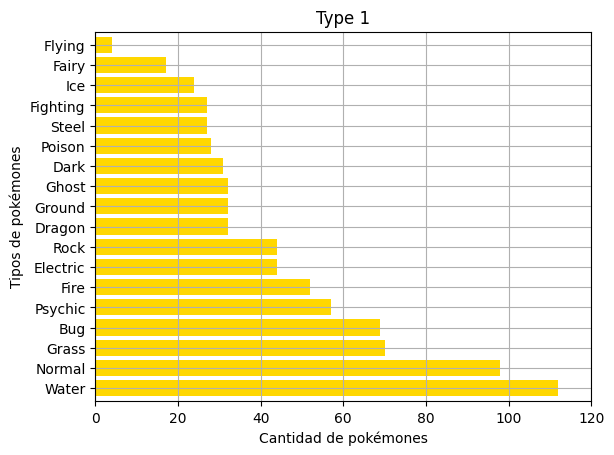

In [8]:
f = df["Type 1"].value_counts().plot(kind="barh", color="Gold", width=0.8)
f.set_xlabel("Cantidad de pokémones")
f.set_ylabel("Tipos de pokémones")
f.set_title("Type 1")
f.set_xlim(0, 120)
plt.grid()
plt.show()

****

In [9]:
'''
5. ¿Cuál es el pokémon más rápido?
'''
poke_fast = df[["Name", "Speed"]].sort_values("Speed", ascending=False)["Name"].iloc[0]
print("Pokémon más rápido:", poke_fast)

Pokémon más rápido: DeoxysSpeed Forme


In [10]:
df[["Name", "Speed"]].sort_values("Speed", ascending=False)

,Name,Speed
431,DeoxysSpeed Forme,180
315,Ninjask,160
428,DeoxysNormal Forme,150
154,AerodactylMega Aerodactyl,150
71,AlakazamMega Alakazam,150
...,...,...
658,Ferroseed,10
486,Bonsly,10
359,Trapinch,10
230,Shuckle,5


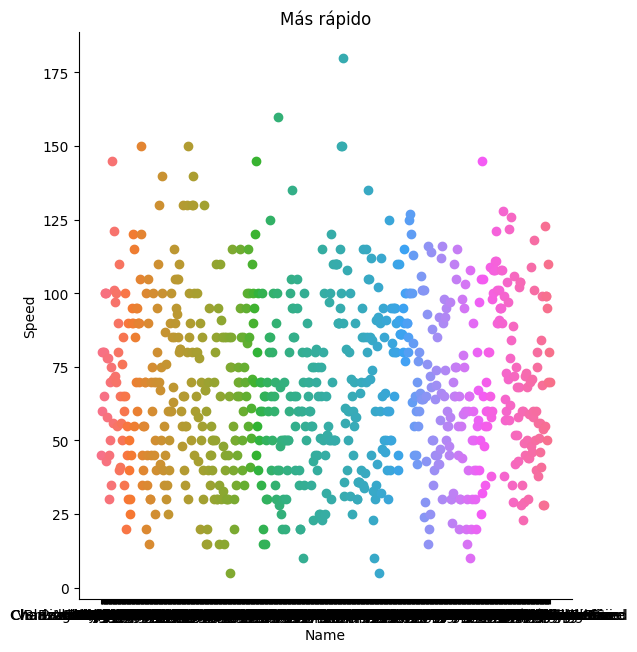

In [11]:
sns.FacetGrid(df, hue="Name", height = 6.4) \
                     .map(plt.scatter, "Name", "Speed") \
                     .set(title="Más rápido")
plt.show()

****

In [12]:
'''
6. ¿Cuántos pokémones tienen una defensa superior a 100?
'''
sup_100 = df[df["Defense"] > 100]["Name"].count()
print("Cantidad de pokémones con más de 100 de defensa:", sup_100)

Cantidad de pokémones con más de 100 de defensa: 123


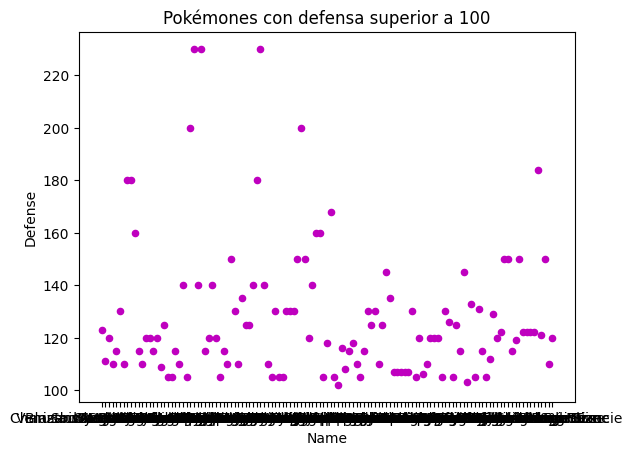

In [13]:
d = df[df["Defense"] > 100].plot(x="Name", y="Defense", 
                                               kind="scatter", color = "m", 
                                               title ="Pokémones con defensa superior a 100")
plt.show()

****

In [14]:
'''
7. ¿Cuántos pokémones tienen una defensa superior a 100 y una velocidad superior a 100?
'''
def_vel = df[(df["Defense"] > 100) & (df["Speed"] > 100)]["Name"].count()
print("Cantidad de pokémones con defensa y velocidad mayores a 100:", def_vel)

Cantidad de pokémones con defensa y velocidad mayores a 100: 9


****

In [15]:
'''
8. Ordena el dataset por el tipo 1 y por el tipo 2
'''
df.sort_values(["Type 1", "Type 2"])

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
656,595,Joltik,Bug,Electric,319,50,47,50,57,50,65,5,False
657,596,Galvantula,Bug,Electric,472,70,77,60,97,60,108,5,False
231,214,Heracross,Bug,Fighting,500,80,125,75,40,95,85,2,False
232,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
697,636,Larvesta,Bug,Fire,360,55,85,55,50,55,60,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,594,Alomomola,Water,NaN,470,165,75,80,40,45,65,5,False
724,656,Froakie,Water,NaN,314,41,56,40,62,44,71,6,False
725,657,Frogadier,Water,NaN,405,54,63,52,83,56,97,6,False
762,692,Clauncher,Water,NaN,330,50,53,62,58,63,44,6,False


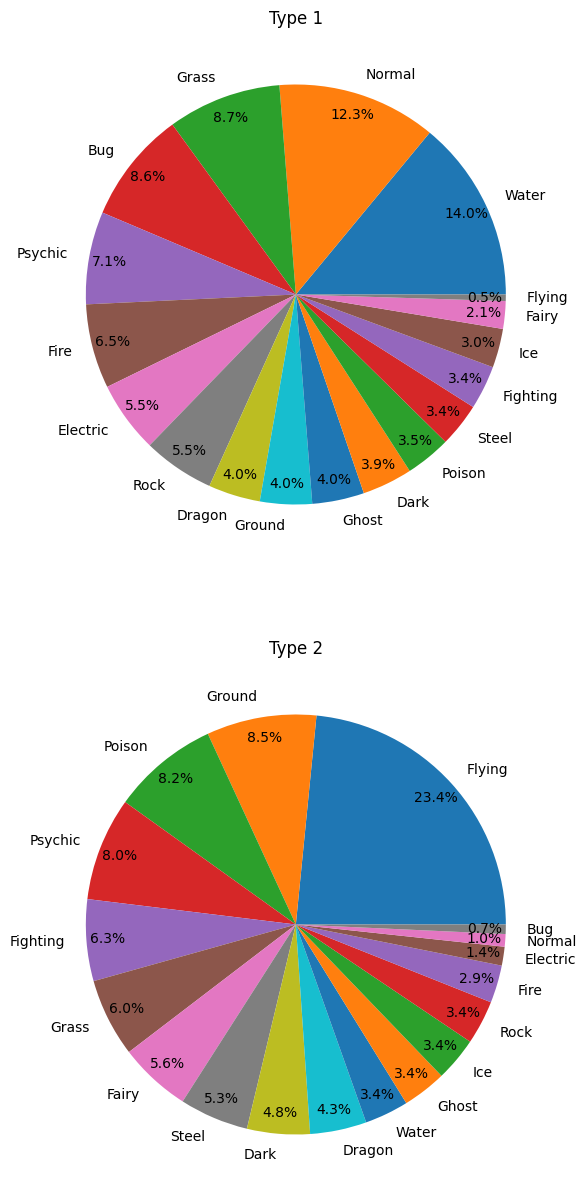

In [16]:
fig = plt.figure(figsize=(15,15))

fig.add_subplot(211)
df["Type 1"].value_counts().plot(kind="pie", 
                                               autopct="%1.1f%%",
                                               pctdistance=0.9,
                                               title = "Type 1",
                                               ylabel = "")
fig.add_subplot(212)
df["Type 2"].value_counts().plot(kind="pie", 
                                               autopct="%1.1f%%",
                                               pctdistance=0.9,
                                               title = "Type 2",
                                               ylabel = "")
plt.show()

****

In [17]:
'''
9. Crea un nuevo dataset con los pokémones de tipo Water y Fire como primer tipo
'''
df_w_f = df[(df["Type 1"] == "Water") | (df["Type 1"] == "Fire")] 
df_w_f.reset_index(drop=True, inplace=True)
df_w_f

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
1,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
2,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
3,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
4,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,667,Litleo,Fire,Normal,369,62,50,58,73,54,72,6,False
160,668,Pyroar,Fire,Normal,507,86,68,72,109,66,106,6,False
161,692,Clauncher,Water,NaN,330,50,53,62,58,63,44,6,False
162,693,Clawitzer,Water,NaN,500,71,73,88,120,89,59,6,False


****

In [18]:
'''
10. Crea un nuevo dataset con los pokémones Legendary
'''
df_legendary = df[df["Legendary"] == True]
df_legendary.reset_index(drop=True,inplace=True)
df_legendary

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
61,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
62,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
63,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


****

In [19]:
'''
11. Calcula el promedio de stats de los pokemon Legendary (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) y los no Legendary
'''
df.groupby("Legendary")[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]].mean()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Legendary,,,,,,
False,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782
True,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615


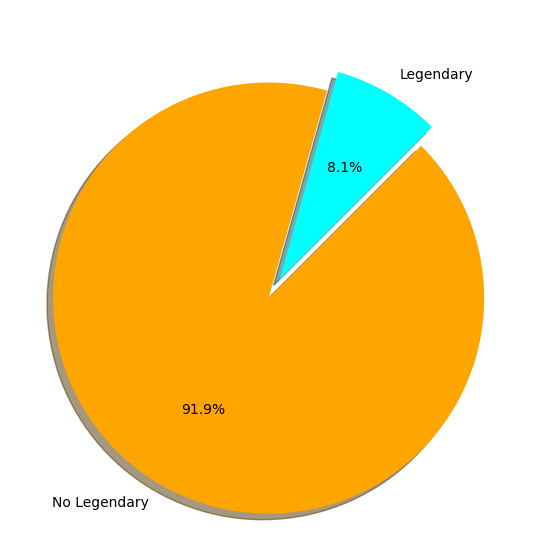

In [20]:
fig = plt.figure(figsize=(7,7))

colours = ["aqua", "orange"]
poke_si = df[df["Legendary"]==True]
poke_no = df[df["Legendary"]==False]

fig_dist = [poke_si["Name"].count(),poke_no["Name"].count()]

fig_pie = plt.pie(fig_dist,
                         labels= ["Legendary", "No Legendary"], 
                         autopct ="%1.1f%%", 
                         shadow = True,
                         colors=colours,
                         startangle = 45,
                         explode=(0, 0.1))

****

In [21]:
'''
12. Crea un nuevo dataframe con el resultado del anterior ejercicio comparando ambos promedios

ejemplo:
                HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
Legendary       99      90       89       91       94     90
No Legendary    80      95       75       12       43     87

'''
cols = ["Legendary", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
df_lg_mean = df[cols].copy()
df_lg_mean["Legendary"] = df_lg_mean["Legendary"].map({True: "Legendary", False: "No Legendary"})

df_lg_mean.groupby("Legendary")[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]].mean().round(2)

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Legendary,,,,,,
Legendary,92.74,116.68,99.66,122.18,105.94,100.18
No Legendary,67.18,75.67,71.56,68.45,68.89,65.46


****

In [22]:
'''
13. Añade una nueva columna ['Doble tipo'] al dataframe inicial que indique si el pokémon tiene dos tipos o no
'''
df["Doble tipo"] = "False"
df.loc[df["Type 1"].notnull() & df["Type 2"].notnull(), "Doble tipo"] = True
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Doble tipo
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,True


****

In [23]:
'''
14. Muestra las columnas Name, Type 1, Type 2 de los pokémones que tienen dos tipos y ordenalos por Type 1 , Type 2 y Name
'''
df_2t = df[df["Doble tipo"]== True][["Type 1", "Type 2", "Name"]]
df_2t.sort_values(["Type 1", "Type 2", "Name"])

,Type 1,Type 2,Name
657,Bug,Electric,Galvantula
656,Bug,Electric,Joltik
231,Bug,Fighting,Heracross
232,Bug,Fighting,HeracrossMega Heracross
697,Bug,Fire,Larvesta
...,...,...,...
626,Water,Rock,Carracosta
240,Water,Rock,Corsola
404,Water,Rock,Relicanth
625,Water,Rock,Tirtouga


****

In [24]:
from functools import reduce

'''
15. Dada una lista de Artículos con sus precios. Define las siguientes funciones:
Puedes definir más funciones si lo consideras necesario.
'''
articulos = {
    'Camisa': 20,
    'Pantalón': 30,
    'Calcetines': 5,
    'Zapatos': 50,
    'Gorra': 10,
    'Bufanda': 15,
    'Gafas': 25,
    'Reloj': 35,
    'Corbata': 40,
}

compra = ['Camisa', 'Pantalón', 'Pantalón', 'Gorra', 'Gafas', 'Corbata']


# A. Una función que calcule el precio total de la compra

# B. Una función que calcule el precio total de la compra con un descuento del 10%

# C. Una función que calcule el precio total de la compra con un descuento del 10% si la compra supera los 100€

# D. Una función que calcule el precio total aplicando el IVA (21%)

# E. Lista los artículos cuyo precio es superior a 20€

****

In [25]:
'''
16. Dada una lista de tuplas con el nombre de un alumno, apellidos, curso y sus notas. 

 Define una función que reciba el curso y saque una lista en la que aparezca nombre, apellidos y el promedio de sus notas.
 Puedes definir más funciones si lo consideras necesario.
'''

alumnos = [('Juan', 'Pérez', '1', [5, 6, 7, 8, 9]),
            ('Ana', 'García', '2', [5, 6, 7, 8, 9]),
            ('Luis', 'González', '1', [5, 6, 7, 8, 9]),
            ('María', 'Martínez', '2', [5, 6, 7, 8, 9]),
            ('Pedro', 'Rodríguez', '1', [5, 6, 7, 8, 9]),
            ('Lucía', 'Hernández', '2', [5, 6, 7, 8, 9]),
            ('Marta', 'López', '1', [5, 6, 7, 8, 9]),
            ('Sara', 'Díaz', '2', [5, 6, 7, 8, 9]),
            ('Javier', 'Sánchez', '1', [5, 6, 7, 8, 9]),
            ('Miguel', 'Fernández', '2', [5, 6, 7, 8, 9]),
            ('Sergio', 'Jiménez', '1', [5, 6, 7, 8, 9]),
            ('Sandra', 'Ruiz', '2', [5, 6, 7, 8, 9]),
            ('Pablo', 'Álvarez', '1', [5, 6, 7, 8, 9]),
            ('María', 'Gómez', '2', [5, 6, 7, 8, 9]),
]

****